In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
print(pd.__version__)

1.3.5


In [4]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
combine = (pd.concat([train_df,test_df]))

# Checking data

# Summary of data
* Null value found on Embarked(2nulls), age(177 nulls) and Cabin (687 nulls)
* different format is used for name


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [6]:
# Check for null value
# 177 null value for age , 687 null value for Cabin
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
class_var = ['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked']
for col in class_var:
    print(col,train_df[col].unique())

Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
Age [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q' nan]


# Descritpive data
Ticket Class(Pclass) show a -0.55 correlation with Fare which is understandable as normally a higher class ticket is more expensive.
While Pclass and Fare also show a high correlation value with Survived, the negative value of the corrlation between survived and Pclass show that the higher the class (1 is highesst, 3 is lowest) , the higher chance the passenger survived

# Summary from the correlation matrix
* Higher class, higher ticket fare
* Higher class/higher ticket fare, higher chance to survived

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [10]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


# Assumption
* PassengerId can be droped as it shall not related to the chance of survival
* Name can be dropped for now as the format is rather not standard and have a low chance to directly contribute to chance of survival

# Exploratory analysis
## Approach
* First, the exploratory analysis will be done on cleaned data first which include Pclass,Sex,Sibsp,Parch,Fare
* Then we will review Embarked & Age with less number of null value
* Then we will review Name to extract useful information for the analysis
* Ticket and Cabin would not be included for the analysis for now as 
   * Ticket does not have a aligned format and also given the situation , seems not correlated to the label
   * Over half of the Cabin value are null value , which make it hard to complete the Cabin value for analysis and even if we try to do so, there could be a large error induced.

## Findings

* Pclass
    * Shown correlation with survival rate 
    * Higher class have higher chance of survived
* Sex
    * Female have higher chance for survival compare to male
* Age
    * Majority of passenger are in the age of 15-40 years old.
    * Children whose age below 5 have a higher survival rate
    * Passenger with age 15-40 have a lower survial rate
* sibsp and parch
    * the features , Sibsp (sibiling and spouse) and parch(Parent and children) have similar meaning which are both refer to number of relatives on board and 
    * have simlar relationship with the survival rate , both the increase sibsp and parch are come with the drop of survival rate
    * Action - create a new metrics , fam_mem ,  by combing sibsp and parch as an input for the algorithm
* Fare 
    * Fare and Pclass are highly correlated with r^2 = -0.55
    * higher fare come with higher survived rate

In [13]:
# Pclass is correlated with Survived with higher class have higher chance of survived
print('Survived Rate per Pclass')
Pclass_sur = train_df.pivot_table(index=['Pclass'],columns=['Survived'],values=['PassengerId'],aggfunc='count')
Pclass_sur[[('rate',0),('rate',1)]] = Pclass_sur['PassengerId'].apply(lambda x:x/x.sum(),axis=1)*100
Pclass_sur.rename({'PassengerId':'count'},axis=1).fillna(0)

Survived Rate per Pclass


count       rate      
Survived     0    1     0     1
Pclass                         
1           80  136 37.04 62.96
2           97   87 52.72 47.28
3          372  119 75.76 24.24

In [14]:
# Female have a higher Survived rate than female
print('Survived Rate per Sex')
sex_sur = train_df.pivot_table(index=['Sex'],columns=['Survived'],values=['PassengerId'],aggfunc='count')
sex_sur[[('rate',0),('rate',1)]] = sex_sur['PassengerId'].apply(lambda x:x/x.sum(),axis=1)*100
sex_sur.rename({'PassengerId':'count'},axis=1).fillna(0)

Survived Rate per Sex


count       rate      
Survived     0    1     0     1
Sex                            
female      81  233 25.80 74.20
male       468  109 81.11 18.89

In [15]:
# Findings 
# Considering the Sibsp (sibiling and spouse) and parch(Parent and children) have similar meaning which are both refer to number of relatives on board and 
# have simlar relationship with the survival rate , both the increase sibsp and parch are come with the drop of survival rate
# Actions
# Create a new metrics by combing sibsp and parch as an input for the algorithm
# Majority of passenger have Sibsp = 0
# Surival rate drop with higher Sibsp value

print('Survived Rate per SibSp')
sibsp_sur = train_df.pivot_table(index=['SibSp'],columns=['Survived'],values=['PassengerId'],aggfunc='count')
sibsp_sur[[('rate',0),('rate',1)]] = sibsp_sur['PassengerId'].apply(lambda x:x/x.sum(),axis=1)*100
sibsp_sur = sibsp_sur.rename({'PassengerId':'count'},axis=1).fillna(0)
sibsp_sur

Survived Rate per SibSp


count          rate      
Survived      0      1      0     1
SibSp                              
0        398.00 210.00  65.46 34.54
1         97.00 112.00  46.41 53.59
2         15.00  13.00  53.57 46.43
3         12.00   4.00  75.00 25.00
4         15.00   3.00  83.33 16.67
5          5.00   0.00 100.00  0.00
8          7.00   0.00 100.00  0.00

In [16]:
# Majority of passenger have parch = 0
# Surival rate drop with higher parch value

print('Survived Rate per Parch')
Parch_sur = train_df.pivot_table(index=['Parch'],columns=['Survived'],values=['PassengerId'],aggfunc='count')
Parch_sur[[('rate',0),('rate',1)]] = Parch_sur['PassengerId'].apply(lambda x:x/x.sum(),axis=1)*100
Parch_sur = Parch_sur.rename({'PassengerId':'count'},axis=1).fillna(0)
Parch_sur

Survived Rate per Parch


count          rate      
Survived      0      1      0     1
Parch                              
0        445.00 233.00  65.63 34.37
1         53.00  65.00  44.92 55.08
2         40.00  40.00  50.00 50.00
3          2.00   3.00  40.00 60.00
4          4.00   0.00 100.00  0.00
5          4.00   1.00  80.00 20.00
6          1.00   0.00 100.00  0.00

In [17]:
# Creating new columns for both train and test dataset 
train_df['fam_mem'] = train_df['SibSp']+train_df['Parch']
test_df['fam_mem'] = test_df['SibSp']+test_df['Parch']

# reviewing the data with this new metrics 'fam_mem'
print('Survived Rate per fam_mem_sur')
fam_mem_sur = train_df.pivot_table(index=['fam_mem'],columns=['Survived'],values=['PassengerId'],aggfunc='count')
fam_mem_sur[[('rate',0),('rate',1)]] = fam_mem_sur['PassengerId'].apply(lambda x:x/x.sum(),axis=1)*100
fam_mem_sur = fam_mem_sur.rename({'PassengerId':'count'},axis=1).fillna(0)
fam_mem_sur

Survived Rate per fam_mem_sur


count          rate      
Survived      0      1      0     1
fam_mem                            
0        374.00 163.00  69.65 30.35
1         72.00  89.00  44.72 55.28
2         43.00  59.00  42.16 57.84
3          8.00  21.00  27.59 72.41
4         12.00   3.00  80.00 20.00
5         19.00   3.00  86.36 13.64
6          8.00   4.00  66.67 33.33
7          6.00   0.00 100.00  0.00
10         7.00   0.00 100.00  0.00

In [18]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,fam_mem
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20,0.90
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69,1.61
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91,0.00
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45,0.00
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00,1.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33,10.00


r^2 of Fare and Pclass:  -0.55


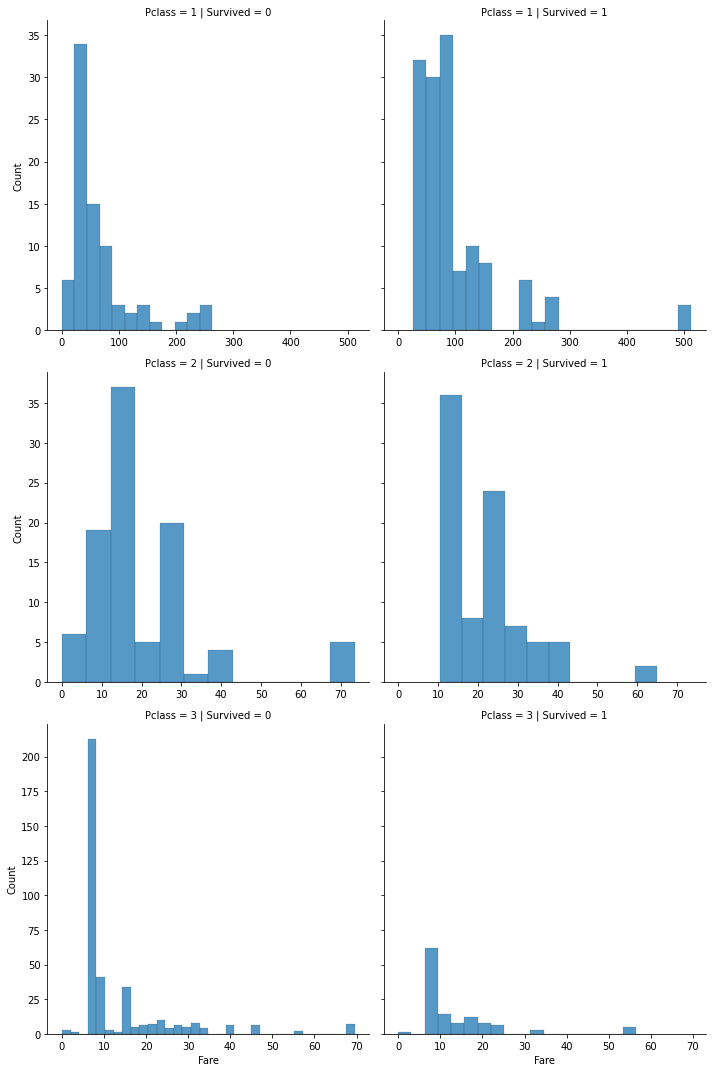

In [19]:
# Fare and Pclass are highly correlated with r^2 = -0.55
# higher fare come with higher survived rate
print('r^2 of Fare and Pclass: ','%.2f' % train_df.corr().loc['Pclass','Fare'])
Fare_dist = sns.displot(data=train_df,x='Fare',col='Survived',row='Pclass',facet_kws={'sharey':'row','sharex':'row'},common_bins=False)

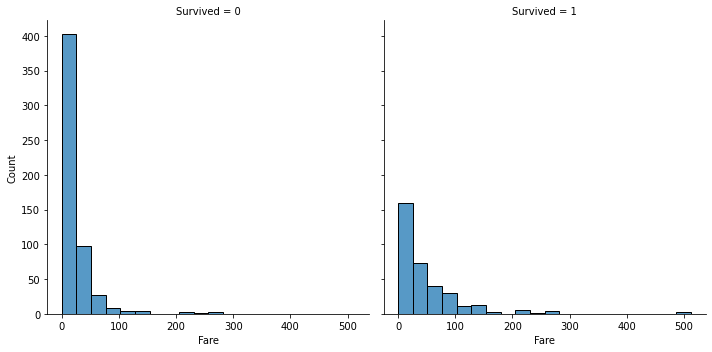

In [20]:
# higher fare come with higher survived rate
sns.displot(data=train_df,x='Fare',col='Survived',common_bins=True,bins=20)

In [21]:
# Passenger who embarked from Cherbourg have a higher rate of surviving compare to Queenstown and Southampton
Embarked_sur = train_df.pivot_table(index=['Embarked'],columns=['Survived'],values=['PassengerId'],aggfunc='count')
Embarked_sur[[('rate',0),('rate',1)]] = Embarked_sur['PassengerId'].apply(lambda x:x/x.sum(),axis=1)*100
Embarked_sur = Embarked_sur.rename({'PassengerId':'count'},axis=1).fillna(0)
Embarked_sur

count       rate      
Survived     0    1     0     1
Embarked                       
C           75   93 44.64 55.36
Q           47   30 61.04 38.96
S          427  217 66.30 33.70

In [22]:
# Try to fill nan value
# Have a look for the nan value first
combine[combine['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.00,1,"Icard, Miss. Amelie",female,38.00,0,0,113572,80.00,B28,NaN
829,830,1.00,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.00,B28,NaN


In [23]:
# These 2 passenger share the same Ticket and Cabin value, let see if there is any order record with the same ticket and Cabin value .
# Only these 2 record are with Cabin B28 and Ticket 113572 which are the null value themselves
# Given the fact that majority(70%) of passenger are from Southampton we would fill the na value with S
(combine[combine['Cabin']=='B28'][['PassengerId','Cabin','Embarked']],combine[combine['Ticket']=='113572'][['PassengerId','Ticket','Embarked']],combine['Embarked'].value_counts())

(     PassengerId Cabin Embarked
 61            62   B28      NaN
 829          830   B28      NaN,
      PassengerId  Ticket Embarked
 61            62  113572      NaN
 829          830  113572      NaN,
 S    914
 C    270
 Q    123
 Name: Embarked, dtype: int64)

In [24]:
# Filling the na value
combine['Embarked'].fillna('S',inplace=True)
train_df['Embarked'].fillna('S',inplace=True)
test_df['Embarked'].fillna('S',inplace=True)
combine['Embarked'].value_counts(dropna=False)

S    916
C    270
Q    123
Name: Embarked, dtype: int64

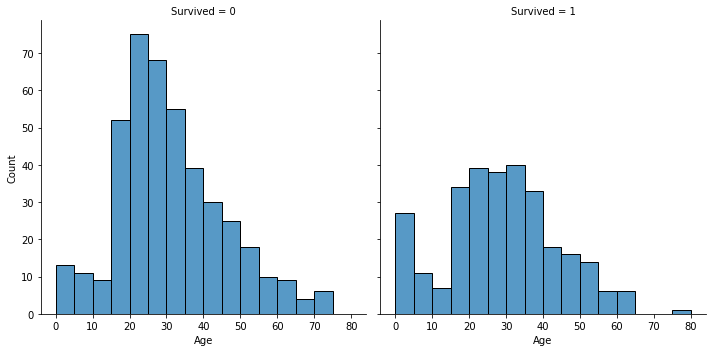

In [25]:
# Majority of passenger are in the age of 15-40 years old.
# Children whose age below 5 have a higher survival rate
# Passenger with age 15-40 have a lower survial rate
age_dist = sns.displot(data=train_df,x='Age',col='Survived',binwidth=5,binrange=[0,80])

In [26]:
# Lets check if there is any sigifcant difference in mean and median of age using difference among grouping by difference metrics
# a larger age mean&median difference across Class while less difference across Sex & Embarked
# Action assign the na value equal to median value of his/her Pclass
print(combine.groupby(['Embarked'])['Age'].describe())
print(combine.groupby(['Pclass'])['Age'].describe())
print(combine.groupby(['Sex'])['Age'].describe())

          count  mean   std  min   25%   50%   75%   max
Embarked                                                
C        212.00 32.33 15.26 0.42 22.00 30.00 45.00 71.00
Q         50.00 28.63 15.05 2.00 19.00 26.50 34.88 70.50
S        784.00 29.30 14.08 0.17 21.00 28.00 37.25 80.00
        count  mean   std  min   25%   50%   75%   max
Pclass                                                
1      284.00 39.16 14.55 0.92 28.00 39.00 50.00 80.00
2      261.00 29.51 13.64 0.67 22.00 29.00 36.00 70.00
3      501.00 24.82 11.96 0.17 18.00 24.00 32.00 74.00
        count  mean   std  min   25%   50%   75%   max
Sex                                                   
female 388.00 28.69 14.58 0.17 19.00 27.00 38.00 76.00
male   658.00 30.59 14.28 0.33 21.00 28.00 39.00 80.00


In [27]:
Pclass_va = combine.groupby('Pclass')['Age'].median().to_dict()
Pclass_va

def fill_age(col1,col2,dict):
    if pd.isnull(col1):
        return dict[col2]
    else :
        return col1
    


In [28]:
# Testing the function to ensure it works
test = pd.DataFrame({'Age':[10,20,30,40,None,None,None],'Pclass':[1,2,3,1,1,2,3]})
print(test)
print(test.apply(lambda x: fill_age(x['Age'],x['Pclass'],Pclass_va),axis=1))

    Age  Pclass
0 10.00       1
1 20.00       2
2 30.00       3
3 40.00       1
4   NaN       1
5   NaN       2
6   NaN       3
0   10.00
1   20.00
2   30.00
3   40.00
4   39.00
5   29.00
6   24.00
dtype: float64


In [29]:
# filling na
combine['Age_filled'] = combine.apply(lambda x: fill_age(x['Age'],x['Pclass'],Pclass_va),axis=1)
train_df['Age_filled'] = train_df.apply(lambda x: fill_age(x['Age'],x['Pclass'],Pclass_va),axis=1)
test_df['Age_filled'] = test_df.apply(lambda x: fill_age(x['Age'],x['Pclass'],Pclass_va),axis=1)
# no null value after filling
combine['Age_filled'].isnull().sum()
train_df['Age_filled'].isnull().sum()
test_df['Age_filled'].isnull().sum()

0

# Converting 
* convert the data into form that suitable to put into the model to train

In [30]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam_mem,Age_filled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,1,22.00
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1,38.00
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,0,26.00
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1,35.00
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,0,35.00


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  fam_mem      891 non-null    int64  
 13  Age_filled   891 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 97.6+ KB


In [32]:
train_df['Sex_conv'] = train_df['Sex'].map({'male':0,'female':1})
test_df['Sex_conv'] = test_df['Sex'].map({'male':0,'female':1})

In [33]:
train_df['Age_group'] =  pd.cut(train_df['Age_filled'],[0,5,15,25,60,80])
test_df['Age_group'] =  pd.cut(test_df['Age_filled'],[0,5,15,25,60,80])

In [34]:
#grouping by age in this 5 groups which have shown difference in survival rate

print('Survived Rate per Age_group')
Age_group_sur = train_df.pivot_table(index=['Age_group'],columns=['Survived'],values=['PassengerId'],aggfunc='count')
Age_group_sur[[('rate',0),('rate',1)]] = Age_group_sur['PassengerId'].apply(lambda x:x/x.sum(),axis=1)*100
Age_group_sur = Age_group_sur.rename({'PassengerId':'count'},axis=1).fillna(0)
Age_group_sur

Survived Rate per Age_group


count       rate      
Survived      0    1     0     1
Age_group                       
(0, 5]       13   31 29.55 70.45
(5, 15]      21   18 53.85 46.15
(15, 25]    245  109 69.21 30.79
(25, 60]    253  179 58.56 41.44
(60, 80]     17    5 77.27 22.73

In [35]:
Age_group = train_df['Age_group'].unique().to_numpy()
Age_group = np.sort(Age_group)
Agedict = {Age_group[i] : i for i in range(len(Age_group))}

In [36]:
print('Age group : ', Agedict)
train_df['Age_group_conv'] = train_df['Age_group'].map(Agedict)
test_df['Age_group_conv'] = test_df['Age_group'].map(Agedict)

Age group :  {Interval(0, 5, closed='right'): 0, Interval(5, 15, closed='right'): 1, Interval(15, 25, closed='right'): 2, Interval(25, 60, closed='right'): 3, Interval(60, 80, closed='right'): 4}


In [37]:
#converting string value for Embarked into [0,1,2] 
train_df['Embarked'].unique()
Embarked_dict = {train_df['Embarked'].unique()[i] : i for i in range(len(train_df['Embarked'].unique()))}
train_df['Embarked_conv'] = train_df['Embarked'].map(Embarked_dict)
test_df['Embarked_conv'] = test_df['Embarked'].map(Embarked_dict)

In [38]:
#Converting fam_mem_sur to group.
#Grouping 4-6 as one group and 7 & 10 as another other group.
fam_mem_dict={}
for i in range(0,11):
    if i <4:
        fam_mem_dict[i]=i
    elif i in [4,5,6]:
        fam_mem_dict[i]=4
    elif i in [7,8,9,10]:
        fam_mem_dict[i]=5
train_df['fam_mem_conv'] = train_df['fam_mem'].map(fam_mem_dict)
test_df['fam_mem_conv'] = test_df['fam_mem'].map(fam_mem_dict)

In [39]:
# Converting fare data by 4 quartile
f_group = [combine['Fare'].min(), combine['Fare'].quantile(0.25),combine['Fare'].quantile(0.5),combine['Fare'].quantile(0.75),combine['Fare'].max()]
train_df['fare_group'] =  pd.cut(train_df['Fare'],f_group,include_lowest=True)
test_df['fare_group'] =  pd.cut(test_df['Fare'],f_group,include_lowest=True)

#geting the interval object
fare_group = np.sort(train_df['fare_group'].unique().to_numpy())
fare_dict = {fare_group[i] : i for i in range(len(fare_group))}

print('Fare group : ', fare_dict)
train_df['fare_group_conv'] = train_df['fare_group'].map(fare_dict)
test_df['fare_group_conv'] = test_df['fare_group'].map(fare_dict)

Fare group :  {Interval(-0.001, 7.896, closed='right'): 0, Interval(7.896, 14.454, closed='right'): 1, Interval(14.454, 31.275, closed='right'): 2, Interval(31.275, 512.329, closed='right'): 3}


In [40]:
#Extracting converted element
y_train, X_train =train_df['Survived'],train_df[['Pclass','Sex_conv','Age_group_conv','Embarked_conv','fam_mem_conv','fare_group_conv']]
X_test =test_df[['Pclass','Sex_conv','Age_group_conv','Embarked_conv','fam_mem_conv','fare_group_conv']]

# Modeling & Predicting

# KNN Method

In [41]:
from sklearn import neighbors, metrics

#using sqrt(size) as k
#distance is used for weights considering 
knn = neighbors.KNeighborsClassifier(n_neighbors=36,weights='distance')

#train the model
knn.fit(X_train , y_train)

#get prediction
y_predict = knn.predict(X_test)

# get score

print('Score for knn method is', round(knn.score(X_train,y_train),2)*100)

Score for knn method is 88.0
